In [1]:
import pandas as pd

In [2]:
df_teams = pd.read_csv('data/teams.csv')
df_games = pd.read_csv('data/games.csv')
df_players = pd.read_csv('data/players.csv')
df_games_detail = pd.read_csv('data/games_details.csv',low_memory = False)

In [3]:
df_teams = df_teams.loc[:,['TEAM_ID','ABBREVIATION','YEARFOUNDED','CITY','ARENA']]

In [4]:
df_games = df_games.loc[:,['GAME_DATE_EST','GAME_ID','HOME_TEAM_ID','PTS_home','AST_home','REB_home','TEAM_ID_away','PTS_away','AST_away','REB_away','HOME_TEAM_WINS']]

In [5]:
# 문제 없는 데이터프레임
df_games_detail_1 = df_games_detail.loc[:,:'START_POSITION']
# 문제 있는 데이터프레임 짜른 뒤 수정
df_games_detail_2 = df_games_detail.loc[:,'COMMENT':].shift(-1,axis= 1)
# 짜른 두 코드를 합쳤다.
df_games_detail = pd.concat([df_games_detail_1,df_games_detail_2],axis=1)

In [6]:
df_games_detail = df_games_detail.loc[:,['GAME_ID', 'TEAM_ID','PLAYER_ID','PLAYER_NAME','START_POSITION',
                       'COMMENT','MIN', 'FG_PCT', 'FG3_PCT', 
                       'DREB', 'REB', 'AST', 'STL', 'BLK','TO']]

In [7]:
rename ={ 'GAME_DATE_EST' : '경기날짜' ,'GAME_ID':'경기ID', 'HOME_TEAM_ID':'홈팀ID','PTS_home':'홈팀점수','AST_home':'홈팀어시','REB_home':'홈팀리바운드','TEAM_ID_away':'어웨이팀ID','PTS_away':'어웨이팀점수','AST_away':'어웨이팀어시','REB_away':'어웨이팀리바운드','HOME_TEAM_WINS':'홈팀승리여부'  }
df_games = df_games.rename(columns=rename)

rename_detail = { 'GAME_ID':'경기ID','TEAM_ID':'팀ID','PLAYER_ID':'선수ID','PLAYER_NAME':'선수명',
                 'START_POSITION':'포지션',
 'COMMENT':'출전시간','MIN':'2점슛', 'FG_PCT':'3점슛', 'FG3_PCT':'자유투',
 'DREB':'리바운드','REB':'어시스트','AST':'가로채기','STL':'블락','BLK':'턴오버','TO':'파울'}
df_games_detail = df_games_detail.rename(columns=rename_detail)
 
rename_playes = { 'PLAYER_NAME':'선수명','TEAM_ID':'팀ID','PLAYER_ID':'선수ID','SEASON':'시즌' }
df_players=df_players.rename(columns=rename_playes)
 
rename_team = {'TEAM_ID':'팀ID','ABBREVIATION':'팀약어','YEARFOUNDED':'팀창설해',
              'CITY':'연고지','ARENA':'홈구장'}
df_teams = df_teams.rename(columns=rename_team)

In [8]:
df_teams.head()

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [9]:
df_games_detail.head()

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0


In [10]:
df_players.head()

,선수명,팀ID,선수ID,시즌
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [11]:
df_teams.head()

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [12]:
df_games=df_games.fillna(0)
df_games_detail = df_games_detail.fillna(0)

In [13]:
# 팀 정보에 필요한 데이터 분석

In [14]:
df_teams.iloc[:,1:].head()

,팀약어,팀창설해,연고지,홈구장
0,ATL,1949,Atlanta,State Farm Arena
1,BOS,1946,Boston,TD Garden
2,NOP,2002,New Orleans,Smoothie King Center
3,CHI,1966,Chicago,United Center
4,DAL,1980,Dallas,American Airlines Center


In [15]:
# 입력받은 정보만을 df로 출력

In [16]:
team_name = 'ATL'

In [17]:
df_teams.loc[df_teams['팀약어'] == team_name,:]

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena


In [18]:
df_teams['팀약어'].unique()

array(['ATL', 'BOS', 'NOP', 'CHI', 'DAL', 'DEN', 'HOU', 'LAC', 'LAL',
       'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX',
       'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET',
       'CHA', 'CLE', 'GSW'], dtype=object)

In [19]:
df_teams[df_teams['팀약어'] == 'ATL']['팀ID'].values[0]

1610612737

In [20]:
df_games[df_games['홈팀ID']==df_teams[df_teams['팀약어'] == 'ATL']['팀ID'].values[0]]

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
8,2022-03-11,22100996,1610612737,112.0,28.0,47.0,1610612746,106.0,22.0,36.0,1
68,2022-03-03,22100710,1610612737,130.0,26.0,33.0,1610612741,124.0,30.0,32.0,1
105,2022-02-26,22100906,1610612737,127.0,27.0,45.0,1610612761,100.0,25.0,42.0,1
143,2022-02-15,22100867,1610612737,124.0,25.0,35.0,1610612739,116.0,30.0,39.0,1
175,2022-02-11,22100841,1610612737,121.0,28.0,49.0,1610612759,136.0,37.0,41.0,0
...,...,...,...,...,...,...,...,...,...,...,...
25602,2014-11-08,21400084,1610612737,103.0,18.0,41.0,1610612752,96.0,26.0,44.0,1
25656,2014-11-01,21400032,1610612737,102.0,26.0,37.0,1610612754,92.0,25.0,44.0,1
25719,2014-10-20,11400089,1610612737,117.0,27.0,40.0,1610612766,114.0,31.0,52.0,1
25729,2014-10-18,11400077,1610612737,100.0,28.0,43.0,1610612765,104.0,28.0,47.0,0


In [21]:
import matplotlib.pyplot as plt

In [22]:
from datetime import datetime

In [23]:
df_games_analysis = df_games.loc[df_games['홈팀ID']==df_teams[df_teams['팀약어'] == 'ATL']['팀ID'].values[0],['경기날짜','홈팀점수','홈팀어시','홈팀리바운드','어웨이팀점수','어웨이팀어시','어웨이팀리바운드','홈팀승리여부']]

In [24]:
column_list = ['경기날짜','홈팀점수','홈팀어시','홈팀리바운드','어웨이팀점수','어웨이팀어시','어웨이팀리바운드','홈팀승리여부']

In [25]:
# 이 기간동안 넣은 평균 차트로 그리기

In [26]:
df_games_analysis.describe()

,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
count,855.000000,855.000000,855.000000,855.000000,855.00000,855.000000,855.000000
mean,102.157895,23.691228,42.444444,100.690058,22.25731,42.217544,0.566082
std,14.615673,5.324646,6.933028,14.696814,5.30955,6.973145,0.495904
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93.000000,20.000000,38.000000,92.000000,19.00000,38.000000,0.000000
50%,102.000000,23.000000,42.000000,99.000000,22.00000,42.000000,1.000000
75%,111.000000,27.000000,47.000000,110.000000,26.00000,46.000000,1.000000
max,161.000000,42.000000,65.000000,168.000000,40.00000,71.000000,1.000000


In [27]:
df_games_analysis

,경기날짜,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
8,2022-03-11,112.0,28.0,47.0,106.0,22.0,36.0,1
68,2022-03-03,130.0,26.0,33.0,124.0,30.0,32.0,1
105,2022-02-26,127.0,27.0,45.0,100.0,25.0,42.0,1
143,2022-02-15,124.0,25.0,35.0,116.0,30.0,39.0,1
175,2022-02-11,121.0,28.0,49.0,136.0,37.0,41.0,0
...,...,...,...,...,...,...,...,...
25602,2014-11-08,103.0,18.0,41.0,96.0,26.0,44.0,1
25656,2014-11-01,102.0,26.0,37.0,92.0,25.0,44.0,1
25719,2014-10-20,117.0,27.0,40.0,114.0,31.0,52.0,1
25729,2014-10-18,100.0,28.0,43.0,104.0,28.0,47.0,0


In [28]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [29]:
df_games_analysis

,경기날짜,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
8,2022-03-11,112.0,28.0,47.0,106.0,22.0,36.0,1
68,2022-03-03,130.0,26.0,33.0,124.0,30.0,32.0,1
105,2022-02-26,127.0,27.0,45.0,100.0,25.0,42.0,1
143,2022-02-15,124.0,25.0,35.0,116.0,30.0,39.0,1
175,2022-02-11,121.0,28.0,49.0,136.0,37.0,41.0,0
...,...,...,...,...,...,...,...,...
25602,2014-11-08,103.0,18.0,41.0,96.0,26.0,44.0,1
25656,2014-11-01,102.0,26.0,37.0,92.0,25.0,44.0,1
25719,2014-10-20,117.0,27.0,40.0,114.0,31.0,52.0,1
25729,2014-10-18,100.0,28.0,43.0,104.0,28.0,47.0,0


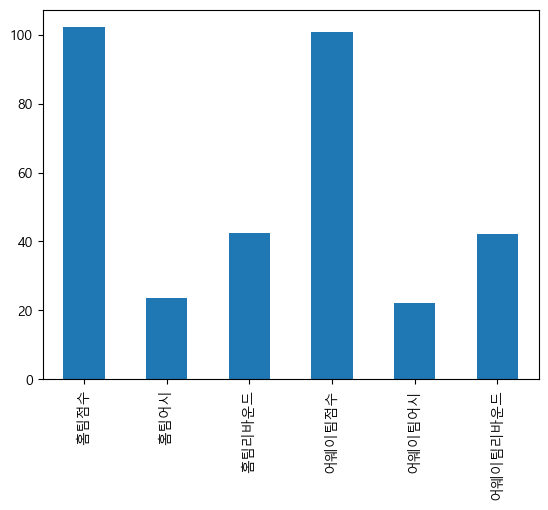

In [30]:
df_games_analysis.iloc[:,1:-1].mean().plot(kind='bar')
plt.show()

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
x= np.arange(3)
x_label = ['점수','어시','리바운드']
value = df_games_analysis.iloc[:,1:3+1].mean()

In [33]:
value2 = df_games_analysis.iloc[:,4:-1].mean()

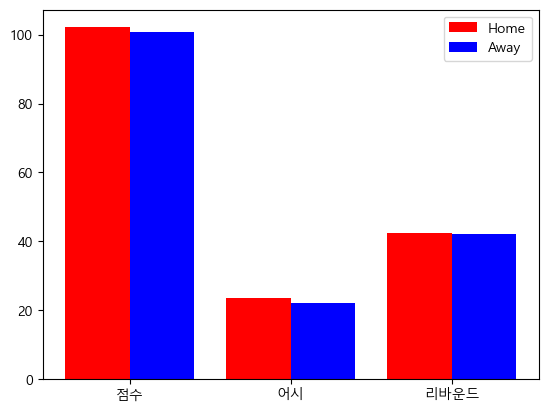

In [34]:
p1=plt.bar(x,value,width = 0.4,color='r')
p2=plt.bar(x+0.4,value2,width = 0.4,color='b')
plt.xticks(np.arange(0.2,3+0.2,1),x_label)
plt.legend((p1[0],p2[0]) , ('Home','Away'), fontsize = 10 )
plt.show()

In [35]:
df_games_detail['선수명'].value_counts()

LeBron James      1757
Udonis Haslem     1657
Andre Iguodala    1541
Kyle Korver       1534
Dwight Howard     1526
                  ... 
Paige Marcus         1
Matt Matt            1
Devin Williams       1
Alex Hamilton        1
Kevin Anderson       1
Name: 선수명, Length: 2549, dtype: int64

In [36]:
# 머신러닝은 선수스탯입력 승리 확률

In [37]:
# 설정한 기간동안에 스탯 정보 보여주기.

In [38]:
# 경기별 팀의 선수 스탯 보여주기 ATL 이고, 날짜는 2021.12.01 ~ 2021.12.04일로 지정

In [39]:
df_teams[df_teams['팀약어']=='ATL']['팀ID'].values[0]

1610612737

In [40]:
df_games[ (df_games['경기날짜'] > '2021-12-01')& (df_games['홈팀ID'] == df_teams[df_teams['팀약어']=='ATL']['팀ID'].values[0]) ]['경기ID']

8      22100996
68     22100710
105    22100906
143    22100867
175    22100841
193    22100816
233    22100783
257    22100767
260    22100751
276    22100737
290    22100725
327    22100687
340    22100670
359    22100660
371    22100643
396    22100621
513    22100502
543    22100470
573    22100434
601    22100407
622    22100384
659    22100350
671    22100335
Name: 경기ID, dtype: int64

In [41]:
df_games_detail.head()

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0


In [42]:
# 전적을 비교하기

In [43]:
df_games['홈팀ID'].unique()

array([1610612748, 1610612741, 1610612759, 1610612744, 1610612743,
       1610612762, 1610612757, 1610612753, 1610612737, 1610612738,
       1610612745, 1610612763, 1610612740, 1610612756, 1610612747,
       1610612755, 1610612766, 1610612765, 1610612749, 1610612750,
       1610612742, 1610612758, 1610612746, 1610612754, 1610612760,
       1610612764, 1610612739, 1610612761, 1610612751, 1610612752],
      dtype=int64)

In [44]:
# 1610612748 , 1610612741 전적 비교

In [45]:
df_games.head()

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0
1,2022-03-12,22101006,1610612741,101.0,20.0,46.0,1610612739,91.0,19.0,40.0,1
2,2022-03-12,22101007,1610612759,108.0,28.0,52.0,1610612754,119.0,23.0,47.0,0
3,2022-03-12,22101008,1610612744,122.0,33.0,55.0,1610612749,109.0,27.0,39.0,1
4,2022-03-12,22101009,1610612743,115.0,32.0,39.0,1610612761,127.0,28.0,50.0,0


In [46]:
df_games[ (df_games['홈팀ID'] ==1610612748) & (df_games['어웨이팀ID'] ==1610612741) ]

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
92,2022-02-28,22100922,1610612748,112.0,28.0,39.0,1610612741,99.0,23.0,38.0,1
616,2021-12-11,22100394,1610612748,118.0,37.0,50.0,1610612741,92.0,22.0,34.0,1
1338,2021-04-26,22000922,1610612748,102.0,18.0,34.0,1610612741,110.0,33.0,51.0,0
1354,2021-04-24,22000907,1610612748,106.0,22.0,37.0,1610612741,101.0,28.0,42.0,1
3161,2019-12-08,21900337,1610612748,110.0,20.0,43.0,1610612741,105.0,20.0,39.0,1
3685,2014-02-23,21300834,1610612748,93.0,22.0,41.0,1610612741,79.0,18.0,51.0,1
4520,2013-10-29,21300002,1610612748,107.0,26.0,40.0,1610612741,95.0,23.0,41.0,1
4651,2013-05-15,41200205,1610612748,94.0,20.0,32.0,1610612741,91.0,14.0,40.0,1
4662,2013-05-08,41200202,1610612748,115.0,29.0,41.0,1610612741,78.0,17.0,28.0,1
4666,2013-05-06,41200201,1610612748,86.0,20.0,32.0,1610612741,93.0,20.0,46.0,0


In [47]:
# df_games 에 홈팀,어웨이팀 이름 표기하기

In [48]:
df_games.head()

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0
1,2022-03-12,22101006,1610612741,101.0,20.0,46.0,1610612739,91.0,19.0,40.0,1
2,2022-03-12,22101007,1610612759,108.0,28.0,52.0,1610612754,119.0,23.0,47.0,0
3,2022-03-12,22101008,1610612744,122.0,33.0,55.0,1610612749,109.0,27.0,39.0,1
4,2022-03-12,22101009,1610612743,115.0,32.0,39.0,1610612761,127.0,28.0,50.0,0


In [49]:
df_teams.head()

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [50]:
df_teams_home = df_teams.rename(columns={'팀ID':'홈팀ID'})

In [51]:
df_games.head()

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0
1,2022-03-12,22101006,1610612741,101.0,20.0,46.0,1610612739,91.0,19.0,40.0,1
2,2022-03-12,22101007,1610612759,108.0,28.0,52.0,1610612754,119.0,23.0,47.0,0
3,2022-03-12,22101008,1610612744,122.0,33.0,55.0,1610612749,109.0,27.0,39.0,1
4,2022-03-12,22101009,1610612743,115.0,32.0,39.0,1610612761,127.0,28.0,50.0,0


In [52]:
df_teams_home.head()

,홈팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [53]:
pd.merge(df_games,df_teams_home, on = '홈팀ID').iloc[:,:-3].rename(columns={'팀약어':'홈팀'})

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA
1,2022-03-11,22100998,1610612748,117.0,28.0,42.0,1610612739,105.0,25.0,40.0,1,MIA
2,2022-03-09,22100983,1610612748,90.0,27.0,38.0,1610612756,111.0,26.0,55.0,0,MIA
3,2022-03-07,22100970,1610612748,123.0,26.0,50.0,1610612745,106.0,22.0,33.0,1,MIA
4,2022-03-05,22100956,1610612748,99.0,20.0,38.0,1610612755,82.0,13.0,41.0,1,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-11-02,21400041,1610612752,96.0,23.0,35.0,1610612766,93.0,20.0,38.0,1,NYK
25792,2014-10-29,21400010,1610612752,80.0,19.0,38.0,1610612741,104.0,21.0,47.0,0,NYK
25793,2014-10-22,11400103,1610612752,103.0,22.0,34.0,1610612764,100.0,18.0,30.0,1,NYK
25794,2014-10-20,11400088,1610612752,107.0,26.0,38.0,1610612749,120.0,26.0,38.0,0,NYK


In [54]:
new_data = pd.merge(df_games,df_teams_home, on = '홈팀ID').iloc[:,:-3].rename(columns={'팀약어':'홈팀'})

In [55]:
df_teams_away = df_teams.rename(columns={'팀ID':'어웨이팀ID'})

In [56]:
new_data.head()

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA
1,2022-03-11,22100998,1610612748,117.0,28.0,42.0,1610612739,105.0,25.0,40.0,1,MIA
2,2022-03-09,22100983,1610612748,90.0,27.0,38.0,1610612756,111.0,26.0,55.0,0,MIA
3,2022-03-07,22100970,1610612748,123.0,26.0,50.0,1610612745,106.0,22.0,33.0,1,MIA
4,2022-03-05,22100956,1610612748,99.0,20.0,38.0,1610612755,82.0,13.0,41.0,1,MIA


In [57]:
df_teams_away.head()

,어웨이팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [58]:
pd.merge(new_data,df_teams_away,on = '어웨이팀ID').iloc[:,:-3].rename(columns={'팀약어':'어웨이팀'})

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀,어웨이팀
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
1,2021-05-07,22001005,1610612748,121.0,27.0,37.0,1610612750,112.0,27.0,41.0,1,MIA,MIN
2,2020-02-26,21900868,1610612748,126.0,30.0,43.0,1610612750,129.0,28.0,33.0,0,MIA,MIN
3,2014-04-04,21301135,1610612748,121.0,20.0,52.0,1610612750,122.0,27.0,46.0,0,MIA,MIN
4,2012-12-18,21200359,1610612748,103.0,25.0,24.0,1610612750,92.0,18.0,53.0,1,MIA,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2017-03-29,21601115,1610612752,88.0,19.0,52.0,1610612748,105.0,18.0,40.0,0,NYK,MIA
25792,2016-02-28,21500883,1610612752,81.0,16.0,39.0,1610612748,98.0,25.0,54.0,0,NYK,MIA
25793,2015-11-27,21500230,1610612752,78.0,16.0,39.0,1610612748,97.0,16.0,42.0,0,NYK,MIA
25794,2015-02-20,21400807,1610612752,87.0,28.0,32.0,1610612748,111.0,28.0,50.0,0,NYK,MIA


In [59]:
df_games=pd.merge(new_data,df_teams_away).iloc[:,:-3].rename(columns={'팀약어':'어웨이팀'})

In [60]:
# 전적비교 그래프 만들기
# 1610612748 , 1610612741 전적 비교

In [61]:
df_games.head()

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀,어웨이팀
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
1,2021-05-07,22001005,1610612748,121.0,27.0,37.0,1610612750,112.0,27.0,41.0,1,MIA,MIN
2,2020-02-26,21900868,1610612748,126.0,30.0,43.0,1610612750,129.0,28.0,33.0,0,MIA,MIN
3,2014-04-04,21301135,1610612748,121.0,20.0,52.0,1610612750,122.0,27.0,46.0,0,MIA,MIN
4,2012-12-18,21200359,1610612748,103.0,25.0,24.0,1610612750,92.0,18.0,53.0,1,MIA,MIN


In [62]:
new_data = df_games[((df_games['홈팀ID'] == 1610612748)&(df_games['어웨이팀ID']==1610612741)) | 
((df_games['어웨이팀ID'] == 1610612748) & (df_games['홈팀ID']==1610612741)) ].mean(numeric_only=None)

C:\Users\5-15\AppData\Local\Temp\ipykernel_6512\582658968.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data = df_games[((df_games['홈팀ID'] == 1610612748)&(df_games['어웨이팀ID']==1610612741)) |


In [63]:
new_data

경기ID        2.572964e+07
홈팀ID        1.610613e+09
홈팀점수        9.675581e+01
홈팀어시        2.068605e+01
홈팀리바운드      4.216279e+01
어웨이팀ID      1.610613e+09
어웨이팀점수      9.584884e+01
어웨이팀어시      2.004651e+01
어웨이팀리바운드    4.183721e+01
홈팀승리여부      5.813953e-01
dtype: float64

In [64]:
new_data.index[[1,2,3]]

Index(['홈팀ID', '홈팀점수', '홈팀어시'], dtype='object')

In [65]:
new_data['어웨이승리'] = 1 - new_data['홈팀승리여부']

In [66]:
new_data

경기ID        2.572964e+07
홈팀ID        1.610613e+09
홈팀점수        9.675581e+01
홈팀어시        2.068605e+01
홈팀리바운드      4.216279e+01
어웨이팀ID      1.610613e+09
어웨이팀점수      9.584884e+01
어웨이팀어시      2.004651e+01
어웨이팀리바운드    4.183721e+01
홈팀승리여부      5.813953e-01
어웨이승리       4.186047e-01
dtype: float64

In [67]:
new_data

경기ID        2.572964e+07
홈팀ID        1.610613e+09
홈팀점수        9.675581e+01
홈팀어시        2.068605e+01
홈팀리바운드      4.216279e+01
어웨이팀ID      1.610613e+09
어웨이팀점수      9.584884e+01
어웨이팀어시      2.004651e+01
어웨이팀리바운드    4.183721e+01
홈팀승리여부      5.813953e-01
어웨이승리       4.186047e-01
dtype: float64

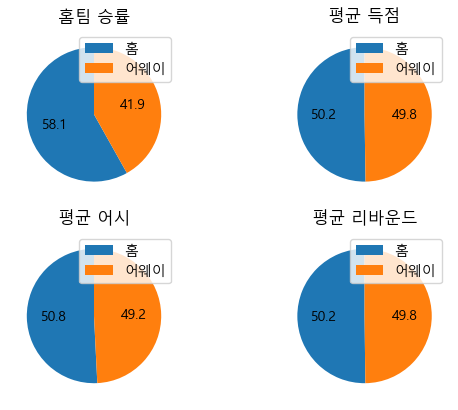

In [68]:
plt.subplot(2,2,1)
plt.pie(new_data[[9,10]],autopct='%.1f',startangle = 90)
plt.title('홈팀 승률')
plt.legend(['홈','어웨이'])


plt.subplot(2,2,2)
plt.pie(new_data[[2,6]],autopct='%.1f',startangle=90)
plt.title('평균 득점')
plt.legend(['홈','어웨이'])


plt.subplot(2,2,3)
plt.pie(new_data[[3,7]],autopct='%.1f',startangle=90)
plt.title('평균 어시')
plt.legend(['홈','어웨이'])

plt.subplot(2,2,4)
plt.pie(new_data[[4,8]],autopct='%.1f',startangle=90)
plt.title('평균 리바운드')
plt.legend(['홈','어웨이'])
plt.show()


In [69]:
# 최근 성적에 점수 그래프로 나타내기

In [70]:
df_games.head()

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀,어웨이팀
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
1,2021-05-07,22001005,1610612748,121.0,27.0,37.0,1610612750,112.0,27.0,41.0,1,MIA,MIN
2,2020-02-26,21900868,1610612748,126.0,30.0,43.0,1610612750,129.0,28.0,33.0,0,MIA,MIN
3,2014-04-04,21301135,1610612748,121.0,20.0,52.0,1610612750,122.0,27.0,46.0,0,MIA,MIN
4,2012-12-18,21200359,1610612748,103.0,25.0,24.0,1610612750,92.0,18.0,53.0,1,MIA,MIN


In [71]:
import plotly.express as px

In [72]:
# 득점 차트 쥬피터는 안보임

In [73]:
px.bar(df_games,x='경기날짜',y=['홈팀점수','어웨이팀점수'])
plt.show()

In [74]:
# 구성 변경

In [75]:
df_games

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀,어웨이팀
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
1,2021-05-07,22001005,1610612748,121.0,27.0,37.0,1610612750,112.0,27.0,41.0,1,MIA,MIN
2,2020-02-26,21900868,1610612748,126.0,30.0,43.0,1610612750,129.0,28.0,33.0,0,MIA,MIN
3,2014-04-04,21301135,1610612748,121.0,20.0,52.0,1610612750,122.0,27.0,46.0,0,MIA,MIN
4,2012-12-18,21200359,1610612748,103.0,25.0,24.0,1610612750,92.0,18.0,53.0,1,MIA,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2017-03-29,21601115,1610612752,88.0,19.0,52.0,1610612748,105.0,18.0,40.0,0,NYK,MIA
25792,2016-02-28,21500883,1610612752,81.0,16.0,39.0,1610612748,98.0,25.0,54.0,0,NYK,MIA
25793,2015-11-27,21500230,1610612752,78.0,16.0,39.0,1610612748,97.0,16.0,42.0,0,NYK,MIA
25794,2015-02-20,21400807,1610612752,87.0,28.0,32.0,1610612748,111.0,28.0,50.0,0,NYK,MIA


In [76]:
df_games['경기날짜'][0] < '2021-02-13'

False

In [77]:
# 선수 탭 꾸미기 위한 데이터

In [78]:
df_players

,선수명,팀ID,선수ID,시즌
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


In [79]:
df_games_detail

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,202706,Jordan Hamilton,0,19,4.0,3.0,6.0,2.0,0.0,2.0,0.0,1.0,3.0
645949,11200005,1610612743,202702,Kenneth Faried,0,23,7.0,0.0,4.0,1.0,1.0,1.0,0.0,3.0,3.0
645950,11200005,1610612743,201585,Kosta Koufos,0,15,3.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,3.0
645951,11200005,1610612743,202389,Timofey Mozgov,0,19,1.0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,2.0


In [80]:
# 선수명 확인

In [81]:
df_players['선수명'].unique()

array(["Royce O'Neale", 'Bojan Bogdanovic', 'Rudy Gobert', ...,
       'Lanny Smith', 'Warren Carter', 'Bennet Davis'], dtype=object)

In [82]:
player_list = df_players[df_players['선수명'].str.contains('taj',case=False)]['선수명'].unique().tolist()

In [83]:
name = player_list[0]

In [84]:
name

'Taj Gibson'

In [85]:
df_players[df_players['선수명'] == name ] 

,선수명,팀ID,선수ID,시즌
27,Taj Gibson,1610612752,201959,2019
955,Taj Gibson,1610612750,201959,2018
1534,Taj Gibson,1610612750,201959,2017
2275,Taj Gibson,1610612760,201959,2016
2566,Taj Gibson,1610612741,201959,2016
3135,Taj Gibson,1610612741,201959,2015
3540,Taj Gibson,1610612741,201959,2014
4327,Taj Gibson,1610612741,201959,2013
4878,Taj Gibson,1610612741,201959,2012
5566,Taj Gibson,1610612741,201959,2011


In [86]:
# df_players 에 team을 merge

In [87]:
df_players.head()

,선수명,팀ID,선수ID,시즌
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [88]:
df_teams.head()

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [89]:
pd.merge(df_players,df_teams,on='팀ID')

,선수명,팀ID,선수ID,시즌,팀약어,팀창설해,연고지,홈구장
0,Royce O'Neale,1610612762,1626220,2019,UTA,1974,Utah,Vivint Smart Home Arena
1,Bojan Bogdanovic,1610612762,202711,2019,UTA,1974,Utah,Vivint Smart Home Arena
2,Rudy Gobert,1610612762,203497,2019,UTA,1974,Utah,Vivint Smart Home Arena
3,Donovan Mitchell,1610612762,1628378,2019,UTA,1974,Utah,Vivint Smart Home Arena
4,Mike Conley,1610612762,201144,2019,UTA,1974,Utah,Vivint Smart Home Arena
...,...,...,...,...,...,...,...,...
7223,Darryl Watkins,1610612739,201208,2009,CLE,1970,Cleveland,Quicken Loans Arena
7224,Luke Nevill,1610612739,202075,2009,CLE,1970,Cleveland,Quicken Loans Arena
7225,Rob Kurz,1610612739,201633,2009,CLE,1970,Cleveland,Quicken Loans Arena
7226,Russell Robinson,1610612739,201781,2009,CLE,1970,Cleveland,Quicken Loans Arena


In [90]:
df_players=pd.merge(df_players,df_teams).iloc[:,0:4+1]

In [91]:
df_players

,선수명,팀ID,선수ID,시즌,팀약어
0,Royce O'Neale,1610612762,1626220,2019,UTA
1,Bojan Bogdanovic,1610612762,202711,2019,UTA
2,Rudy Gobert,1610612762,203497,2019,UTA
3,Donovan Mitchell,1610612762,1628378,2019,UTA
4,Mike Conley,1610612762,201144,2019,UTA
...,...,...,...,...,...
7223,Darryl Watkins,1610612739,201208,2009,CLE
7224,Luke Nevill,1610612739,202075,2009,CLE
7225,Rob Kurz,1610612739,201633,2009,CLE
7226,Russell Robinson,1610612739,201781,2009,CLE


In [92]:
df_player = df_players[df_players['선수명'] == 'Briante Weber' ]

In [93]:
df_player

,선수명,팀ID,선수ID,시즌,팀약어
1758,Briante Weber,1610612766,1627362,2016,CHA
2207,Briante Weber,1610612763,1627362,2017,MEM
2257,Briante Weber,1610612763,1627362,2015,MEM
2490,Briante Weber,1610612744,1627362,2016,GSW
2934,Briante Weber,1610612748,1627362,2018,MIA
2983,Briante Weber,1610612748,1627362,2016,MIA
3001,Briante Weber,1610612748,1627362,2015,MIA
3935,Briante Weber,1610612747,1627362,2017,LAL
6321,Briante Weber,1610612745,1627362,2017,HOU


In [94]:
df_player['팀약어'].unique().tolist()

['CHA', 'MEM', 'GSW', 'MIA', 'LAL', 'HOU']

In [95]:
#df_games_detail 에 경기날짜 추가하기

In [96]:
df_games_detail

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,202706,Jordan Hamilton,0,19,4.0,3.0,6.0,2.0,0.0,2.0,0.0,1.0,3.0
645949,11200005,1610612743,202702,Kenneth Faried,0,23,7.0,0.0,4.0,1.0,1.0,1.0,0.0,3.0,3.0
645950,11200005,1610612743,201585,Kosta Koufos,0,15,3.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,3.0
645951,11200005,1610612743,202389,Timofey Mozgov,0,19,1.0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,2.0


In [97]:
df_games.head()

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀,어웨이팀
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
1,2021-05-07,22001005,1610612748,121.0,27.0,37.0,1610612750,112.0,27.0,41.0,1,MIA,MIN
2,2020-02-26,21900868,1610612748,126.0,30.0,43.0,1610612750,129.0,28.0,33.0,0,MIA,MIN
3,2014-04-04,21301135,1610612748,121.0,20.0,52.0,1610612750,122.0,27.0,46.0,0,MIA,MIN
4,2012-12-18,21200359,1610612748,103.0,25.0,24.0,1610612750,92.0,18.0,53.0,1,MIA,MIN


In [98]:
df_games_detail.columns.tolist()

['경기ID',
 '팀ID',
 '선수ID',
 '선수명',
 '포지션',
 '출전시간',
 '2점슛',
 '3점슛',
 '자유투',
 '리바운드',
 '어시스트',
 '가로채기',
 '블락',
 '턴오버',
 '파울']

In [99]:
df_games_detail.head()

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0


In [100]:
df_games.head()

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀,어웨이팀
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
1,2021-05-07,22001005,1610612748,121.0,27.0,37.0,1610612750,112.0,27.0,41.0,1,MIA,MIN
2,2020-02-26,21900868,1610612748,126.0,30.0,43.0,1610612750,129.0,28.0,33.0,0,MIA,MIN
3,2014-04-04,21301135,1610612748,121.0,20.0,52.0,1610612750,122.0,27.0,46.0,0,MIA,MIN
4,2012-12-18,21200359,1610612748,103.0,25.0,24.0,1610612750,92.0,18.0,53.0,1,MIA,MIN


In [101]:
pd.merge(df_games_detail,df_games,on='경기ID')

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,...,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀,어웨이팀
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,...,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,...,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,...,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,...,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,...,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646880,11200005,1610612743,202706,Jordan Hamilton,0,19,4.0,3.0,6.0,2.0,...,104.0,21.0,40.0,1610612743,106.0,25.0,34.0,0,LAC,DEN
646881,11200005,1610612743,202702,Kenneth Faried,0,23,7.0,0.0,4.0,1.0,...,104.0,21.0,40.0,1610612743,106.0,25.0,34.0,0,LAC,DEN
646882,11200005,1610612743,201585,Kosta Koufos,0,15,3.0,0.0,0.0,8.0,...,104.0,21.0,40.0,1610612743,106.0,25.0,34.0,0,LAC,DEN
646883,11200005,1610612743,202389,Timofey Mozgov,0,19,1.0,0.0,0.0,3.0,...,104.0,21.0,40.0,1610612743,106.0,25.0,34.0,0,LAC,DEN


In [102]:
df_games_detail=pd.merge(df_games_detail,df_games).loc[:,:'경기날짜'].sort_values('경기날짜',ascending=False)

In [103]:
df_games_detail

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0,2022-03-12
105,22101009,1610612761,1629004,Svi Mykhailiuk,0,1:02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-12
107,22101009,1610612743,201145,Jeff Green,F,24:10,6.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,3.0,2022-03-12
108,22101009,1610612743,203999,Nikola Jokic,C,30:31,9.0,0.0,8.0,10.0,7.0,0.0,2.0,3.0,2.0,2022-03-12
109,22101009,1610612743,203115,Will Barton,G,32:06,7.0,2.0,0.0,5.0,4.0,0.0,0.0,4.0,4.0,2022-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285151,10300001,1610612762,2306,Carlos Arroyo,0,5,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,2003-10-05
285150,10300001,1610612762,1052,Ben Handlogten,0,5,2.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,4.0,2003-10-05
285149,10300001,1610612762,1905,Andrei Kirilenko,0,5,0.0,0.0,1.0,5.0,2.0,2.0,1.0,4.0,1.0,2003-10-05
285148,10300001,1610612762,2144,Ademola Okulaja,0,5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,2003-10-05


In [104]:
df_games_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646885 entries, 0 to 285157
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   경기ID    646885 non-null  int64  
 1   팀ID     646885 non-null  int64  
 2   선수ID    646885 non-null  int64  
 3   선수명     646885 non-null  object 
 4   포지션     646885 non-null  object 
 5   출전시간    646885 non-null  object 
 6   2점슛     646885 non-null  float64
 7   3점슛     646885 non-null  float64
 8   자유투     646885 non-null  float64
 9   리바운드    646885 non-null  float64
 10  어시스트    646885 non-null  float64
 11  가로채기    646885 non-null  float64
 12  블락      646885 non-null  float64
 13  턴오버     646885 non-null  float64
 14  파울      646885 non-null  float64
 15  경기날짜    646885 non-null  object 
dtypes: float64(9), int64(3), object(4)
memory usage: 83.9+ MB


In [105]:
df_player

,선수명,팀ID,선수ID,시즌,팀약어
1758,Briante Weber,1610612766,1627362,2016,CHA
2207,Briante Weber,1610612763,1627362,2017,MEM
2257,Briante Weber,1610612763,1627362,2015,MEM
2490,Briante Weber,1610612744,1627362,2016,GSW
2934,Briante Weber,1610612748,1627362,2018,MIA
2983,Briante Weber,1610612748,1627362,2016,MIA
3001,Briante Weber,1610612748,1627362,2015,MIA
3935,Briante Weber,1610612747,1627362,2017,LAL
6321,Briante Weber,1610612745,1627362,2017,HOU


In [106]:
type(df_player['선수ID'].unique()[0])

numpy.int64

In [107]:
df_player_data = df_games_detail[df_games_detail['선수ID'] == df_player['선수ID'].unique()[0]]

In [108]:
df_player_data

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜
425073,11800073,1610612748,1627362,Briante Weber,0,6:08,0.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,2.0,2018-10-12
425223,11800062,1610612748,1627362,Briante Weber,0,22:08,4.0,1.0,5.0,3.0,3.0,4.0,0.0,3.0,2.0,2018-10-10
425751,11800051,1610612748,1627362,Briante Weber,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-10-08
426310,11800031,1610612748,1627362,Briante Weber,0,24:00,3.0,0.0,4.0,0.0,6.0,6.0,0.0,1.0,4.0,2018-10-05
426609,11800016,1610612748,1627362,Briante Weber,0,12:00,4.0,2.0,0.0,3.0,3.0,0.0,0.0,1.0,2.0,2018-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508098,21500992,1610612763,1627362,Briante Weber,G,34:37,1.0,0.0,1.0,7.0,3.0,2.0,0.0,5.0,1.0,2016-03-14
508451,21500974,1610612763,1627362,Briante Weber,G,31:33,1.0,0.0,0.0,4.0,3.0,3.0,1.0,0.0,1.0,2016-03-12
508821,21500967,1610612763,1627362,Briante Weber,G,39:42,4.0,0.0,2.0,5.0,7.0,1.0,1.0,2.0,2.0,2016-03-11
533665,11500104,1610612748,1627362,Briante Weber,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-23


In [109]:
df_player

,선수명,팀ID,선수ID,시즌,팀약어
1758,Briante Weber,1610612766,1627362,2016,CHA
2207,Briante Weber,1610612763,1627362,2017,MEM
2257,Briante Weber,1610612763,1627362,2015,MEM
2490,Briante Weber,1610612744,1627362,2016,GSW
2934,Briante Weber,1610612748,1627362,2018,MIA
2983,Briante Weber,1610612748,1627362,2016,MIA
3001,Briante Weber,1610612748,1627362,2015,MIA
3935,Briante Weber,1610612747,1627362,2017,LAL
6321,Briante Weber,1610612745,1627362,2017,HOU


In [110]:
df_games_detail.head()

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0,2022-03-12
105,22101009,1610612761,1629004,Svi Mykhailiuk,0,1:02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-12
107,22101009,1610612743,201145,Jeff Green,F,24:10,6.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,3.0,2022-03-12
108,22101009,1610612743,203999,Nikola Jokic,C,30:31,9.0,0.0,8.0,10.0,7.0,0.0,2.0,3.0,2.0,2022-03-12
109,22101009,1610612743,203115,Will Barton,G,32:06,7.0,2.0,0.0,5.0,4.0,0.0,0.0,4.0,4.0,2022-03-12


In [111]:
df_teams.head()

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [112]:
pd.merge(df_games_detail,df_teams,on='팀ID').iloc[:,:-3]

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜,팀약어
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0,2022-03-12,MIN
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0,2022-03-12,MIN
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0,2022-03-12,MIN
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0,2022-03-12,MIN
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0,2022-03-12,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646880,10300016,1610612760,951,Ray Allen,0,5,1.0,1.0,6.0,4.0,6.0,0.0,0.0,3.0,4.0,2003-10-08,OKC
646881,10300016,1610612760,1740,Rashard Lewis,0,5,13.0,4.0,5.0,4.0,2.0,3.0,0.0,1.0,1.0,2003-10-08,OKC
646882,10300016,1610612760,2501,Reggie Evans,0,5,0.0,0.0,7.0,4.0,0.0,1.0,0.0,1.0,2.0,2003-10-08,OKC
646883,10300016,1610612760,958,Vitaly Potapenko,0,5,2.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,2003-10-08,OKC


In [113]:
df_games_detail = pd.merge(df_games_detail,df_teams).iloc[:,:-3]

In [114]:
df_games_detail

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜,팀약어
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0,2022-03-12,MIN
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0,2022-03-12,MIN
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0,2022-03-12,MIN
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0,2022-03-12,MIN
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0,2022-03-12,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646880,10300016,1610612760,951,Ray Allen,0,5,1.0,1.0,6.0,4.0,6.0,0.0,0.0,3.0,4.0,2003-10-08,OKC
646881,10300016,1610612760,1740,Rashard Lewis,0,5,13.0,4.0,5.0,4.0,2.0,3.0,0.0,1.0,1.0,2003-10-08,OKC
646882,10300016,1610612760,2501,Reggie Evans,0,5,0.0,0.0,7.0,4.0,0.0,1.0,0.0,1.0,2.0,2003-10-08,OKC
646883,10300016,1610612760,958,Vitaly Potapenko,0,5,2.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,2003-10-08,OKC


In [115]:
# 팀을 선택하여 스탯보기

In [116]:
df_player_data = df_games_detail[df_games_detail['선수ID'] == df_player['선수ID'].unique()[0]]

In [117]:
df_player_data['팀약어'].unique().tolist()

['GSW', 'MIA', 'CHA', 'MEM', 'HOU', 'LAL']

In [118]:
df_player_data

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜,팀약어
90788,21600873,1610612744,1627362,Briante Weber,0,2:20,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2017-02-25,GSW
90794,21600854,1610612744,1627362,Briante Weber,0,2:52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2017-02-23,GSW
90804,21600847,1610612744,1627362,Briante Weber,0,5:30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2017-02-15,GSW
90820,21600827,1610612744,1627362,Briante Weber,0,24:12,1.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,2.0,2017-02-13,GSW
90838,21600813,1610612744,1627362,Briante Weber,0,2:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-02-11,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434749,11700058,1610612747,1627362,Briante Weber,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-10-10,LAL
434768,11700043,1610612747,1627362,Briante Weber,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-10-08,LAL
434777,11700022,1610612747,1627362,Briante Weber,0,21:37,2.0,0.0,1.0,3.0,5.0,0.0,0.0,0.0,4.0,2017-10-04,LAL
434796,11700011,1610612747,1627362,Briante Weber,0,0:28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-10-02,LAL


In [119]:
# 공격지표

In [120]:
df_player_data.iloc[:,[6,7,8,-2]]

,2점슛,3점슛,자유투,경기날짜
90788,2.0,0.0,0.0,2017-02-25
90794,0.0,0.0,0.0,2017-02-23
90804,0.0,0.0,0.0,2017-02-15
90820,1.0,0.0,0.0,2017-02-13
90838,0.0,0.0,0.0,2017-02-11
...,...,...,...,...
434749,0.0,0.0,0.0,2017-10-10
434768,0.0,0.0,0.0,2017-10-08
434777,2.0,0.0,1.0,2017-10-04
434796,0.0,0.0,0.0,2017-10-02


In [121]:
df_games_detail[df_games_detail['출전시간'] != '0' ].iloc[:,6:-2].mean()

2점슛     2.997083
3점슛     0.641024
자유투     1.451194
리바운드    3.396407
어시스트    1.755062
가로채기    0.604487
블락      0.385996
턴오버     1.105932
파울      1.675572
dtype: float64

In [122]:
# 해당경기 선수 평균구하기

In [123]:
list_game_id = df_player_data['경기ID']

In [124]:
df_games_detail[df_games_detail['경기ID'].isin(list_game_id)].groupby('경기날짜').mean().iloc[:,[0,3,4,5,6,7,8,9,10,11]]

,경기ID,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울
경기날짜,,,,,,,,,,
2015-10-21,11500096.0,2.114286,0.457143,1.457143,2.942857,1.228571,0.457143,0.457143,0.771429,1.428571
2015-10-23,11500104.0,1.540541,0.486486,1.378378,2.405405,0.891892,0.243243,0.324324,0.810811,1.351351
2016-03-11,21500967.0,3.560000,0.520000,1.760000,4.320000,2.000000,0.800000,0.520000,1.080000,2.120000
2016-03-12,21500974.0,2.760000,0.680000,0.920000,4.200000,1.680000,0.760000,0.680000,1.080000,1.120000
2016-03-14,21500992.0,2.923077,0.769231,1.500000,4.269231,1.653846,0.769231,0.538462,1.230769,1.807692
...,...,...,...,...,...,...,...,...,...,...
2018-10-02,11800016.0,2.076923,0.641026,1.230769,2.410256,1.282051,0.282051,0.358974,0.666667,1.461538
2018-10-05,11800031.0,2.548387,0.838710,1.645161,2.806452,1.483871,0.774194,0.387097,1.225806,1.838710
2018-10-08,11800051.0,1.810811,0.459459,0.756757,2.675676,1.054054,0.351351,0.324324,1.054054,1.351351


In [125]:
game_player_mean = df_games_detail[df_games_detail['경기ID'].isin(list_game_id)].groupby('경기날짜').mean().iloc[:,[0,3,4,5,6,7,8,9,10,11]]

In [126]:
df_player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 90788 to 434814
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   경기ID    94 non-null     int64  
 1   팀ID     94 non-null     int64  
 2   선수ID    94 non-null     int64  
 3   선수명     94 non-null     object 
 4   포지션     94 non-null     object 
 5   출전시간    94 non-null     object 
 6   2점슛     94 non-null     float64
 7   3점슛     94 non-null     float64
 8   자유투     94 non-null     float64
 9   리바운드    94 non-null     float64
 10  어시스트    94 non-null     float64
 11  가로채기    94 non-null     float64
 12  블락      94 non-null     float64
 13  턴오버     94 non-null     float64
 14  파울      94 non-null     float64
 15  경기날짜    94 non-null     object 
 16  팀약어     94 non-null     object 
dtypes: float64(9), int64(3), object(5)
memory usage: 13.2+ KB


In [127]:
df_player_data = df_player_data.sort_values('경기날짜',ascending=False)

In [128]:
game_player_mean['경기ID'] = game_player_mean['경기ID'].astype(int) 

In [129]:
game_player_mean=game_player_mean.sort_values('경기날짜',ascending=False)

In [130]:
total_player_data = pd.merge(df_player_data,game_player_mean,on='경기ID')

In [131]:
total_player_data.columns

Index(['경기ID', '팀ID', '선수ID', '선수명', '포지션', '출전시간', '2점슛_x', '3점슛_x', '자유투_x',
       '리바운드_x', '어시스트_x', '가로채기_x', '블락_x', '턴오버_x', '파울_x', '경기날짜', '팀약어',
       '2점슛_y', '3점슛_y', '자유투_y', '리바운드_y', '어시스트_y', '가로채기_y', '블락_y',
       '턴오버_y', '파울_y'],
      dtype='object')

In [132]:
rename_columns = { '2점슛_x' : '2점슛' , '3점슛_x' : '3점슛' , '자유투_x' :'자유투',
                 '리바운드_x':'리바운드','어시스트_x':'어시스트', '가로채기_x' : '가로채기',
                 '블락_x':'블락','턴오버_x':'턴오버','파울_x':'파울','2점슛_y':'경기평균2점',
                 '3점슛_y':'경기평균3점','자유투_y':'경기평균자유투','리바운드_y':'경기평균리바운드',
                 '어시스트_y':'경기평균어시스트','가로채기_y':'경기평균가로채기','블락_y':'경기평균블락',
                 '턴오버_y':'경기평균턴오버','파울_y':'경기평균파울'}

In [133]:
total_player_data = total_player_data.rename(columns=rename_columns)

In [134]:
total_player_data.columns

Index(['경기ID', '팀ID', '선수ID', '선수명', '포지션', '출전시간', '2점슛', '3점슛', '자유투',
       '리바운드', '어시스트', '가로채기', '블락', '턴오버', '파울', '경기날짜', '팀약어', '경기평균2점',
       '경기평균3점', '경기평균자유투', '경기평균리바운드', '경기평균어시스트', '경기평균가로채기', '경기평균블락',
       '경기평균턴오버', '경기평균파울'],
      dtype='object')

In [135]:
# 팀별

In [136]:
df_player_data

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜,팀약어
175214,11800073,1610612748,1627362,Briante Weber,0,6:08,0.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,2.0,2018-10-12,MIA
175235,11800062,1610612748,1627362,Briante Weber,0,22:08,4.0,1.0,5.0,3.0,3.0,4.0,0.0,3.0,2.0,2018-10-10,MIA
175255,11800051,1610612748,1627362,Briante Weber,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-10-08,MIA
175265,11800031,1610612748,1627362,Briante Weber,0,24:00,3.0,0.0,4.0,0.0,6.0,6.0,0.0,1.0,4.0,2018-10-05,MIA
175286,11800016,1610612748,1627362,Briante Weber,0,12:00,4.0,2.0,0.0,3.0,3.0,0.0,0.0,1.0,2.0,2018-10-02,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371632,21500992,1610612763,1627362,Briante Weber,G,34:37,1.0,0.0,1.0,7.0,3.0,2.0,0.0,5.0,1.0,2016-03-14,MEM
371645,21500974,1610612763,1627362,Briante Weber,G,31:33,1.0,0.0,0.0,4.0,3.0,3.0,1.0,0.0,1.0,2016-03-12,MEM
371664,21500967,1610612763,1627362,Briante Weber,G,39:42,4.0,0.0,2.0,5.0,7.0,1.0,1.0,2.0,2.0,2016-03-11,MEM
178915,11500104,1610612748,1627362,Briante Weber,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-10-23,MIA


In [137]:
df_player_data['팀약어'].unique()

array(['MIA', 'MEM', 'HOU', 'LAL', 'CHA', 'GSW'], dtype=object)

In [138]:
# MIA , MEM 으로 정보검색

In [139]:
df_player_data[df_player_data['팀약어'].isin(['MIA','MEM']) ].count()[0]

38

In [140]:
pd.DataFrame({'선수명':df_players['선수명'].unique()})

,선수명
0,Royce O'Neale
1,Bojan Bogdanovic
2,Rudy Gobert
3,Donovan Mitchell
4,Mike Conley
...,...
1744,Kevin Anderson
1745,Anthony Parker
1746,Jawad Williams
1747,Loren Woods


In [141]:
# 머신러닝 준비

In [142]:
df_games

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부,홈팀,어웨이팀
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0,MIA,MIN
1,2021-05-07,22001005,1610612748,121.0,27.0,37.0,1610612750,112.0,27.0,41.0,1,MIA,MIN
2,2020-02-26,21900868,1610612748,126.0,30.0,43.0,1610612750,129.0,28.0,33.0,0,MIA,MIN
3,2014-04-04,21301135,1610612748,121.0,20.0,52.0,1610612750,122.0,27.0,46.0,0,MIA,MIN
4,2012-12-18,21200359,1610612748,103.0,25.0,24.0,1610612750,92.0,18.0,53.0,1,MIA,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2017-03-29,21601115,1610612752,88.0,19.0,52.0,1610612748,105.0,18.0,40.0,0,NYK,MIA
25792,2016-02-28,21500883,1610612752,81.0,16.0,39.0,1610612748,98.0,25.0,54.0,0,NYK,MIA
25793,2015-11-27,21500230,1610612752,78.0,16.0,39.0,1610612748,97.0,16.0,42.0,0,NYK,MIA
25794,2015-02-20,21400807,1610612752,87.0,28.0,32.0,1610612748,111.0,28.0,50.0,0,NYK,MIA


In [143]:
df_games_detail

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜,팀약어
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0,2022-03-12,MIN
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0,2022-03-12,MIN
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0,2022-03-12,MIN
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0,2022-03-12,MIN
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0,2022-03-12,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646880,10300016,1610612760,951,Ray Allen,0,5,1.0,1.0,6.0,4.0,6.0,0.0,0.0,3.0,4.0,2003-10-08,OKC
646881,10300016,1610612760,1740,Rashard Lewis,0,5,13.0,4.0,5.0,4.0,2.0,3.0,0.0,1.0,1.0,2003-10-08,OKC
646882,10300016,1610612760,2501,Reggie Evans,0,5,0.0,0.0,7.0,4.0,0.0,1.0,0.0,1.0,2.0,2003-10-08,OKC
646883,10300016,1610612760,958,Vitaly Potapenko,0,5,2.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,2003-10-08,OKC


In [144]:
df_games_detail['포지션'].value_counts()

0    399331
G     99037
F     99025
C     49492
Name: 포지션, dtype: int64

In [145]:
# k-nn 머신러닝

In [146]:
df_games_detail.head()

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜,팀약어
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0,2022-03-12,MIN
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0,2022-03-12,MIN
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0,2022-03-12,MIN
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0,2022-03-12,MIN
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0,2022-03-12,MIN


In [147]:
k_nn_data = df_games_detail.iloc[:,4:14+1]

In [148]:
k_nn_data.head()

,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울
0,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0
1,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0
2,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0
3,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0
4,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0


In [149]:
k_nn_data['포지션'].unique()

array(['F', 'C', 'G', 0], dtype=object)

In [150]:
# 0인 애들 제거

In [151]:
k_nn_data = k_nn_data[k_nn_data['포지션'] != 0 ]

In [152]:
# set x,y

In [153]:
k_nn_data.head()

,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울
0,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0
1,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0
2,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0
3,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0
4,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0


In [154]:
y=k_nn_data['포지션']
X=k_nn_data.iloc[:,[3,4,5,6,-2]]

In [155]:
# y 가 문자이므로 인코딩

In [156]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [157]:
sorted(y.unique())

['C', 'F', 'G']

In [158]:
ct = ColumnTransformer( [ ( 'encoder', OneHotEncoder() , [0]  ) ] , 
                  remainder= 'passthrough' )
y = ct.fit_transform(y.to_frame())

In [159]:
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [160]:
# 피쳐스케일링

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
Scaler_X = MinMaxScaler()
X= Scaler_X.fit_transform(X)

In [163]:
# train/ test

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [165]:
# k-nn

In [166]:
from sklearn.neighbors import KNeighborsClassifier
# 가장 가까운 5개 데이터로 분류 n_neighbors= default parameter 가 5 이다.
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [167]:
y_pred = classifier.predict(X_test)

In [168]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5415501947034207

In [169]:
new_data=np.array([3,10,1,0,1])

In [170]:
new_data=new_data.reshape(1,5)

In [171]:
new_data = Scaler_X.transform(new_data)

C:\Users\5-15\anaconda3\envs\YH\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



In [172]:
new_data = classifier.predict(new_data)

In [173]:
np.argmax(new_data,axis=1).reshape(-1,1)

array([[2]], dtype=int64)

In [226]:
import pandas as pd

df_teams = pd.read_csv('data/teams.csv')
df_games = pd.read_csv('data/games.csv')
df_players = pd.read_csv('data/players.csv')
df_games_detail = pd.read_csv('data/games_details.csv',low_memory = False)

df_teams = df_teams.loc[:,['TEAM_ID','ABBREVIATION','YEARFOUNDED','CITY','ARENA']]
df_games = df_games.loc[:,['GAME_DATE_EST','GAME_ID','HOME_TEAM_ID','PTS_home','AST_home','REB_home','TEAM_ID_away','PTS_away','AST_away','REB_away','HOME_TEAM_WINS']]
# 문제 없는 데이터프레임
df_games_detail_1 = df_games_detail.loc[:,:'START_POSITION']
# 문제 있는 데이터프레임 짜른 뒤 수정
df_games_detail_2 = df_games_detail.loc[:,'COMMENT':].shift(-1,axis= 1)
# 짜른 두 코드를 합쳤다.
df_games_detail = pd.concat([df_games_detail_1,df_games_detail_2],axis=1)
df_games_detail = df_games_detail.loc[:,['GAME_ID', 'TEAM_ID','PLAYER_ID','PLAYER_NAME','START_POSITION',
                       'COMMENT','MIN', 'FG_PCT', 'FG3_PCT', 
                       'DREB', 'REB', 'AST', 'STL', 'BLK','TO']]
rename ={ 'GAME_DATE_EST' : '경기날짜' ,'GAME_ID':'경기ID', 'HOME_TEAM_ID':'홈팀ID','PTS_home':'홈팀점수','AST_home':'홈팀어시','REB_home':'홈팀리바운드','TEAM_ID_away':'어웨이팀ID','PTS_away':'어웨이팀점수','AST_away':'어웨이팀어시','REB_away':'어웨이팀리바운드','HOME_TEAM_WINS':'홈팀승리여부'  }
df_games = df_games.rename(columns=rename)
df_games=df_games.fillna(0)

rename_detail = { 'GAME_ID':'경기ID','TEAM_ID':'팀ID','PLAYER_ID':'선수ID','PLAYER_NAME':'선수명',
                 'START_POSITION':'포지션',
 'COMMENT':'출전시간','MIN':'2점슛', 'FG_PCT':'3점슛', 'FG3_PCT':'자유투',
 'DREB':'리바운드','REB':'어시스트','AST':'가로채기','STL':'블락','BLK':'턴오버','TO':'파울'}
df_games_detail = df_games_detail.rename(columns=rename_detail)
df_games_detail = df_games_detail.fillna(0)
    
rename_playes = { 'PLAYER_NAME':'선수명','TEAM_ID':'팀ID','PLAYER_ID':'선수ID','SEASON':'시즌' }
df_players=df_players.rename(columns=rename_playes)
    
rename_team = {'TEAM_ID':'팀ID','ABBREVIATION':'팀약어','YEARFOUNDED':'팀창설해',
                'CITY':'연고지','ARENA':'홈구장'}
df_teams = df_teams.rename(columns=rename_team)

# 가공을 편하게 하기위해 df_games에 홈팀명,어웨이팀명 추가
df_teams_home = df_teams.rename(columns={'팀ID':'홈팀ID'})
new_data = pd.merge(df_games,df_teams_home, on = '홈팀ID').iloc[:,:-3].rename(columns={'팀약어':'홈팀'})
df_teams_away = df_teams.rename(columns={'팀ID':'어웨이팀ID'})
df_games=pd.merge(new_data,df_teams_away,on = '어웨이팀ID').iloc[:,:-3].rename(columns={'팀약어':'어웨이팀'})

# 가공을 편하게 하기 위해 df_platers에 팀명 추가
df_players=pd.merge(df_players,df_teams,on='팀ID').iloc[:,0:4+1]

# 가공을 편하게 하기 위해 df_games_detail 에 날짜 추가
df_games_detail=pd.merge(df_games_detail,df_games,on='경기ID').loc[:,:'경기날짜'].sort_values('경기날짜',ascending=False)

# 가공을 편하게 하기위해 df_games_detail에 약어 추가
df_games_detail = pd.merge(df_games_detail,df_teams,on='팀ID').iloc[:,:-3]

In [187]:
df_games_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646885 entries, 0 to 646884
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   경기ID    646885 non-null  int64  
 1   팀ID     646885 non-null  int64  
 2   선수ID    646885 non-null  int64  
 3   선수명     646885 non-null  object 
 4   포지션     646885 non-null  object 
 5   출전시간    646885 non-null  object 
 6   2점슛     646885 non-null  float64
 7   3점슛     646885 non-null  float64
 8   자유투     646885 non-null  float64
 9   리바운드    646885 non-null  float64
 10  어시스트    646885 non-null  float64
 11  가로채기    646885 non-null  float64
 12  블락      646885 non-null  float64
 13  턴오버     646885 non-null  float64
dtypes: float64(8), int64(3), object(3)
memory usage: 74.0+ MB


In [188]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   팀ID     30 non-null     int64 
 1   팀약어     30 non-null     object
 2   팀창설해    30 non-null     int64 
 3   연고지     30 non-null     object
 4   홈구장     30 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


In [184]:
df_teams[['팀ID','팀약어']]

,팀ID,팀약어
0,1610612737,ATL
1,1610612738,BOS
2,1610612740,NOP
3,1610612741,CHI
4,1610612742,DAL
5,1610612743,DEN
6,1610612745,HOU
7,1610612746,LAC
8,1610612747,LAL
9,1610612748,MIA


In [185]:
# 가공을 편하게 하기위해 df_games_detail에 약어 추가
df_games_detail = pd.merge(df_games_detail,df_teams[['팀ID','팀약어']],on='팀ID').iloc[:,:-3]

In [186]:
df_games_detail

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646880,10300016,1610612760,951,Ray Allen,0,5,1.0,1.0,6.0,4.0,6.0,0.0,0.0,3.0
646881,10300016,1610612760,1740,Rashard Lewis,0,5,13.0,4.0,5.0,4.0,2.0,3.0,0.0,1.0
646882,10300016,1610612760,2501,Reggie Evans,0,5,0.0,0.0,7.0,4.0,0.0,1.0,0.0,1.0
646883,10300016,1610612760,958,Vitaly Potapenko,0,5,2.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0


In [191]:
import pandas as pd

df_teams = pd.read_csv('data/teams.csv')
df_games = pd.read_csv('data/games.csv')
df_players = pd.read_csv('data/players.csv')
df_games_detail = pd.read_csv('data/games_details.csv',low_memory = False)


In [203]:
df_games_detail.head(323442).to_csv('data/games_details_half.csv')

In [208]:
df_games_detail.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


In [273]:
import pandas as pd

df_teams = pd.read_csv('data/teams.csv')
df_games = pd.read_csv('data/games.csv')
df_players = pd.read_csv('data/players.csv')
# ec2 에서 작동하지 않아 half 로 읽어왔습니다.
#df_games_detail = pd.read_csv('data/games_details.csv',low_memory = False)
df_games_detail = pd.read_csv('data/games_details_half.csv',low_memory = False)

df_teams = df_teams.loc[:,['TEAM_ID','ABBREVIATION','YEARFOUNDED','CITY','ARENA']]
df_games = df_games.loc[:,['GAME_DATE_EST','GAME_ID','HOME_TEAM_ID','PTS_home','AST_home','REB_home','TEAM_ID_away','PTS_away','AST_away','REB_away','HOME_TEAM_WINS']]
# 문제 없는 데이터프레임
df_games_detail_1 = df_games_detail.loc[:,:'START_POSITION']
# 문제 있는 데이터프레임 짜른 뒤 수정
df_games_detail_2 = df_games_detail.loc[:,'COMMENT':].shift(-1,axis= 1)
# 짜른 두 코드를 합쳤다.
df_games_detail = pd.concat([df_games_detail_1,df_games_detail_2],axis=1)
df_games_detail = df_games_detail.loc[:,['GAME_ID', 'TEAM_ID','PLAYER_ID','PLAYER_NAME','START_POSITION',
                       'COMMENT','MIN', 'FG_PCT', 'FG3_PCT', 
                       'DREB', 'REB', 'AST', 'STL', 'BLK','TO']]
rename ={ 'GAME_DATE_EST' : '경기날짜' ,'GAME_ID':'경기ID', 'HOME_TEAM_ID':'홈팀ID','PTS_home':'홈팀점수','AST_home':'홈팀어시','REB_home':'홈팀리바운드','TEAM_ID_away':'어웨이팀ID','PTS_away':'어웨이팀점수','AST_away':'어웨이팀어시','REB_away':'어웨이팀리바운드','HOME_TEAM_WINS':'홈팀승리여부'  }
df_games = df_games.rename(columns=rename)
df_games=df_games.fillna(0)

rename_detail = { 'GAME_ID':'경기ID','TEAM_ID':'팀ID','PLAYER_ID':'선수ID','PLAYER_NAME':'선수명',
                 'START_POSITION':'포지션',
 'COMMENT':'출전시간','MIN':'2점슛', 'FG_PCT':'3점슛', 'FG3_PCT':'자유투',
 'DREB':'리바운드','REB':'어시스트','AST':'가로채기','STL':'블락','BLK':'턴오버','TO':'파울'}
df_games_detail = df_games_detail.rename(columns=rename_detail)
df_games_detail = df_games_detail.fillna(0)
    
rename_playes = { 'PLAYER_NAME':'선수명','TEAM_ID':'팀ID','PLAYER_ID':'선수ID','SEASON':'시즌' }
df_players=df_players.rename(columns=rename_playes)
    
rename_team = {'TEAM_ID':'팀ID','ABBREVIATION':'팀약어','YEARFOUNDED':'팀창설해',
                'CITY':'연고지','ARENA':'홈구장'}
df_teams = df_teams.rename(columns=rename_team)

# 가공을 편하게 하기위해 df_games에 홈팀명,어웨이팀명 추가
df_teams_home = df_teams.rename(columns={'팀ID':'홈팀ID'})
new_data = pd.merge(df_games,df_teams_home, on = '홈팀ID').iloc[:,:-3].rename(columns={'팀약어':'홈팀'})
df_teams_away = df_teams.rename(columns={'팀ID':'어웨이팀ID'})
df_games=pd.merge(new_data,df_teams_away,on = '어웨이팀ID').iloc[:,:-3].rename(columns={'팀약어':'어웨이팀'})

# 가공을 편하게 하기 위해 df_platers에 팀명 추가
df_players=pd.merge(df_players,df_teams,on='팀ID').iloc[:,0:4+1]

# 가공을 편하게 하기 위해 df_games_detail 에 날짜 추가
df_games_detail=pd.merge(df_games_detail,df_games,on='경기ID').loc[:,:'경기날짜'].sort_values('경기날짜',ascending=False)

# 가공을 편하게 하기위해 df_games_detail에 약어 추가
df_games_detail = pd.merge(df_games_detail,df_teams[['팀ID','팀약어']],on='팀ID').iloc[:,:-3]

In [224]:
df_players[df_players['선수명'] =='Braian Angola-Rodas']

,선수명,팀ID,선수ID,시즌,팀약어
5107,Braian Angola-Rodas,1610612753,1629132,2018,ORL


In [225]:
df_games_detail[df_games_detail['선수ID'] == df_player['선수ID'].unique()[0]]

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버


In [227]:
df_games_detail

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울,경기날짜,팀약어
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0,2022-03-12,MIN
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0,2022-03-12,MIN
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0,2022-03-12,MIN
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0,2022-03-12,MIN
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0,2022-03-12,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646880,10300016,1610612760,951,Ray Allen,0,5,1.0,1.0,6.0,4.0,6.0,0.0,0.0,3.0,4.0,2003-10-08,OKC
646881,10300016,1610612760,1740,Rashard Lewis,0,5,13.0,4.0,5.0,4.0,2.0,3.0,0.0,1.0,1.0,2003-10-08,OKC
646882,10300016,1610612760,2501,Reggie Evans,0,5,0.0,0.0,7.0,4.0,0.0,1.0,0.0,1.0,2.0,2003-10-08,OKC
646883,10300016,1610612760,958,Vitaly Potapenko,0,5,2.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,2.0,2003-10-08,OKC


In [ ]:
i

In [256]:
from datetime import datetime

In [257]:
type(df_games['경기날짜'].tail(1).values[0])

str

In [258]:
datetime.strptime(df_games['경기날짜'].tail(1).values[0],'%Y-%m-%d' )

datetime.datetime(2014, 11, 30, 0, 0)

In [268]:
all_player_list = sorted(df_players['선수명'].unique())
pd.DataFrame({'선수명':all_player_list})

,선수명
0,AJ Hammons
1,AJ Price
2,Aaron Brooks
3,Aaron Craft
4,Aaron Gordon
...,...
1744,Zhou Qi
1745,Zion Williamson
1746,Zoran Dragic
1747,Zydrunas Ilgauskas


In [274]:
df_teams.head()

,팀ID,팀약어,팀창설해,연고지,홈구장
0,1610612737,ATL,1949,Atlanta,State Farm Arena
1,1610612738,BOS,1946,Boston,TD Garden
2,1610612740,NOP,2002,New Orleans,Smoothie King Center
3,1610612741,CHI,1966,Chicago,United Center
4,1610612742,DAL,1980,Dallas,American Airlines Center


In [275]:
df_games.head()

,경기날짜,경기ID,홈팀ID,홈팀점수,홈팀어시,홈팀리바운드,어웨이팀ID,어웨이팀점수,어웨이팀어시,어웨이팀리바운드,홈팀승리여부
0,2022-03-12,22101005,1610612748,104.0,23.0,53.0,1610612750,113.0,21.0,46.0,0
1,2022-03-12,22101006,1610612741,101.0,20.0,46.0,1610612739,91.0,19.0,40.0,1
2,2022-03-12,22101007,1610612759,108.0,28.0,52.0,1610612754,119.0,23.0,47.0,0
3,2022-03-12,22101008,1610612744,122.0,33.0,55.0,1610612749,109.0,27.0,39.0,1
4,2022-03-12,22101009,1610612743,115.0,32.0,39.0,1610612761,127.0,28.0,50.0,0


In [276]:
df_players

,선수명,팀ID,선수ID,시즌
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


In [277]:
df_games_detail

,경기ID,팀ID,선수ID,선수명,포지션,출전시간,2점슛,3점슛,자유투,리바운드,어시스트,가로채기,블락,턴오버,파울
0,22101005,1610612750,1630162,Anthony Edwards,F,36:22,4.0,3.0,4.0,8.0,5.0,3.0,1.0,1.0,1.0
1,22101005,1610612750,1630183,Jaden McDaniels,F,23:54,6.0,1.0,1.0,6.0,0.0,0.0,2.0,2.0,6.0
2,22101005,1610612750,1626157,Karl-Anthony Towns,C,25:17,4.0,1.0,6.0,10.0,0.0,0.0,0.0,3.0,4.0
3,22101005,1610612750,1627736,Malik Beasley,G,30:52,4.0,4.0,0.0,3.0,1.0,1.0,0.0,1.0,4.0
4,22101005,1610612750,1626156,D'Angelo Russell,G,33:46,3.0,1.0,7.0,6.0,9.0,1.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323437,21000864,1610612761,202334,Ed Davis,0,23:25,5.0,0.0,1.0,5.0,0.0,0.0,2.0,2.0,4.0
323438,21000864,1610612761,2571,Leandro Barbosa,0,26:30,7.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,3.0
323439,21000864,1610612761,201573,Jerryd Bayless,0,24:15,2.0,0.0,6.0,5.0,5.0,1.0,0.0,1.0,3.0
323440,21000864,1610612761,201603,Sonny Weems,0,11:57,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
